# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

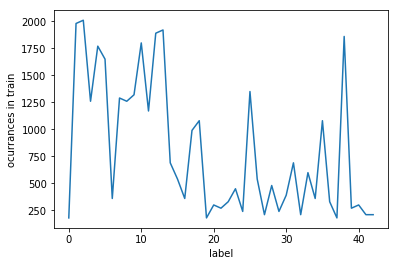

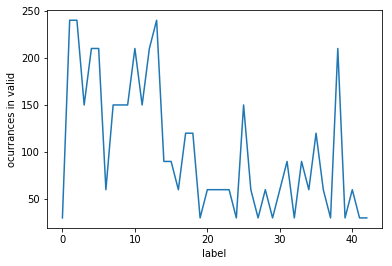

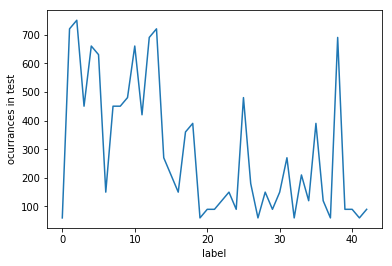

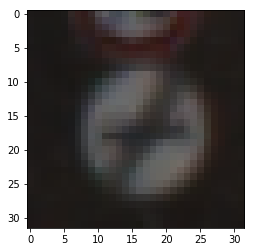

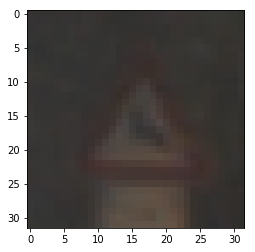

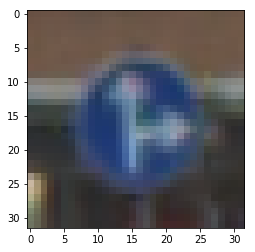

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import collections
# Visualizations will be shown in the notebook.
%matplotlib inline

### Print occurrances of the labels.
def plot_dist(y, set_name):
    count = collections.Counter(y)
    y_count = []
    for x in sorted(count):
        y_count.append(count[x])

    plt.plot(y_count)
    plt.xlabel('label')
    plt.ylabel('ocurrances in %s' % set_name)
    plt.show()
    
plot_dist(y_train, 'train')
plot_dist(y_valid, 'valid')
plot_dist(y_test, 'test')

### Plot first nPlot signs.
seen_label = set()
nPlot = 3
for i, label in enumerate(y_train):
    if label not in seen_label:
        plt.figure()
        plt.imshow(X_train[i])
        seen_label.add(label)
        if len(seen_label) >= nPlot:
            break

In [4]:
from PIL import Image

### Rotate the images to increase the data.

def append_array(a1, a2):
    return np.append(a1, a2, axis=0)

def rotate_image(X_train, angle):
    return np.array([np.asarray(Image.Image.rotate(Image.fromarray(np.uint8(x)), angle)) for x in X_train])

angle = 4
X_train_cw = rotate_image(X_train, -angle)
X_train_ccw = rotate_image(X_train, angle)
X_train_cw2 = rotate_image(X_train, -angle * 2)
X_train_ccw2 = rotate_image(X_train, angle * 2)

X_train = append_array(X_train, X_train_cw)
X_train = append_array(X_train, X_train_ccw)
X_train = append_array(X_train, X_train_cw2)
X_train = append_array(X_train, X_train_ccw2)

y_train_orig = y_train
y_train = append_array(y_train, y_train_orig)
y_train = append_array(y_train, y_train_orig)
y_train = append_array(y_train, y_train_orig)
y_train = append_array(y_train, y_train_orig)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Normalize the pixel data
def normalize(X):
    return (X - 128.) / 128.

X_train = normalize(X_train)
X_valid = normalize(X_valid)

# Shuffle the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
def LeNet(x, keep_prob):
    mu = 0.
    sigma = 0.1

    # layer 1, convolution
    w1 = tf.Variable(tf.truncated_normal(shape=(5,5,3,16), mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.zeros(16))
    conv1 = tf.nn.conv2d(x, w1, strides=[1,1,1,1], padding='VALID') + b1
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # layer 2, convolution
    w2 = tf.Variable(tf.truncated_normal(shape=(5,5,16,32), mean=mu, stddev=sigma))
    b2 = tf.Variable(tf.zeros(32))
    conv2 = tf.nn.conv2d(conv1, w2, strides=[1,1,1,1], padding='VALID') + b2
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten
    fc0 = flatten(conv2)

    # layer 3, fully connected
    w3 = tf.Variable(tf.truncated_normal(shape=(800,400), mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros(400))
    fc1 = tf.matmul(fc0, w3) + b3
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # layer 4, fully connected
    w4 = tf.Variable(tf.truncated_normal(shape=(400,200), mean=mu, stddev=sigma))
    b4 = tf.Variable(tf.zeros(200))
    fc2 = tf.matmul(fc1, w4) + b4
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # layer 5, logits
    w5 = tf.Variable(tf.truncated_normal(shape=(200,43), mean=mu, stddev=sigma))
    b5 = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, w5) + b5
    
    return logits


In [7]:
### Training

EPOCHS = 5
BATCH_SIZE = 128 # n_train = 34799

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001
logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [8]:
### Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y:batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
keep_prob_train = 0.5
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:keep_prob_train})

        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, '.model_traffic_sign')
    print("Model saved")


Training...

EPOCH 1 ...
Training Accuracy = 0.990
Validation Accuracy = 0.951

EPOCH 2 ...
Training Accuracy = 0.997
Validation Accuracy = 0.963

EPOCH 3 ...
Training Accuracy = 0.998
Validation Accuracy = 0.969

EPOCH 4 ...
Training Accuracy = 0.999
Validation Accuracy = 0.958

EPOCH 5 ...
Training Accuracy = 0.999
Validation Accuracy = 0.968

Model saved


In [10]:
### Prepare test data
X_test_orig = X_test
X_test = normalize(X_test)

In [11]:
### Read the sign names
import csv
sign_map = {}
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sign_map[int(row['ClassId'])] = row['SignName']

INFO:tensorflow:Restoring parameters from ./.model_traffic_sign
Test Accuracy = 0.958
1.0 16 16 Vehicles over 3.5 metric tons prohibited
1.0 1 1 Speed limit (30km/h)
1.0 38 38 Keep right


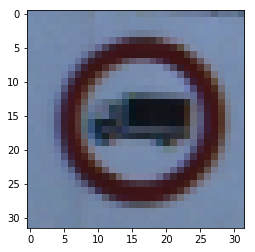

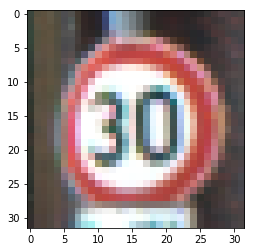

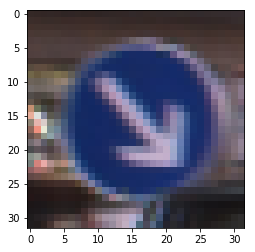

In [12]:
### Calculate test error

nAna = 3
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    for i in range(nAna):
        output = sess.run(tf.nn.softmax(logits), feed_dict={x: X_test, keep_prob:1.0})
        indx = np.argsort(output[i])[::-1]
        print(output[i][indx[0]], indx[0], y_test[i], sign_map[y_test[i]])

### Show some test images.
for i in range(nAna):
    plt.figure()
    plt.imshow(X_test_orig[i])

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

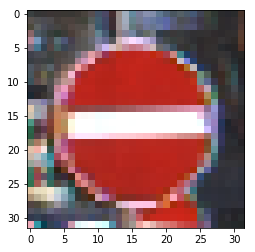

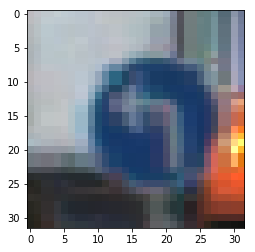

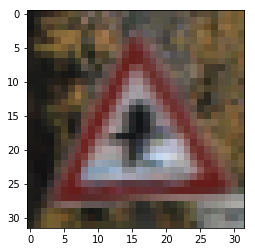

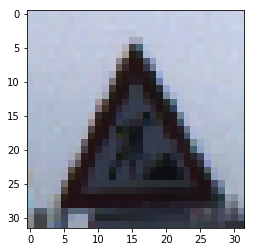

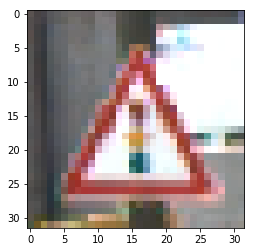

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imread

def read_ppm(filename):
    img = Image.fromarray(np.uint8(imread(filename)))
    img = img.resize((32, 32))
    return np.asarray(img)

imgs = []
filenames = ['01000.ppm', '02000.ppm', '03000.ppm', '04000.ppm', '05000.ppm'] # GTSRB Final Test
for filename in filenames:
    imgs.append(read_ppm('download_test_data/%s' % filename))
imgs = np.array(imgs)

for img in imgs:
    plt.figure()
    plt.imshow(img)

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

imgs = normalize(imgs)

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    outputs = sess.run(tf.nn.softmax(logits), feed_dict={x: imgs, keep_prob:1.0})
    for out in outputs:
        sorted_index = np.argsort(out)[::-1]
        best_index = sorted_index[0]
        print('%4.2f %2d %s' % (out[best_index], best_index, sign_map[best_index]))

INFO:tensorflow:Restoring parameters from ./.model_traffic_sign
1.00 17 No entry
1.00 34 Turn left ahead
1.00 11 Right-of-way at the next intersection
0.87 25 Road work
1.00 26 Traffic signals


### Analyze Performance

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

y_download = [17, 34, 11, 25, 26] # true values.
predictions = []
for isample, out in enumerate(outputs):
    sorted_index = np.argsort(out)[::-1]
    best_index = sorted_index[0]
    predictions.append(best_index)
    
nCorr = 0.
nTot = 0.
for a, b in zip(y_download, predictions):
    if a == b:
        nCorr += 1
    nTot += 1
acc = nCorr / nTot * 100.
print('Accuracy: %.1f' % acc)

Accuracy: 100.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    top5 = sess.run(tf.nn.top_k(tf.constant(outputs), k=5))
    
for i in range(len(filenames)):
    print('\nFile: %s:' % filenames[i])
    print('\n%10s %2s %s' % ('prob', 'id', 'name'))
    for k in range(5):
        prob = top5.values[i, k]
        ind = top5.indices[i, k]
        name = sign_map[ind]
        print('%10.2g %2d %s' % (prob, ind, name))


File: 01000.ppm:

      prob id name
         1 17 No entry
         0  0 Speed limit (20km/h)
         0  1 Speed limit (30km/h)
         0  2 Speed limit (50km/h)
         0  3 Speed limit (60km/h)

File: 02000.ppm:

      prob id name
         1 34 Turn left ahead
   5.7e-06 38 Keep right
   1.2e-07 35 Ahead only
   2.2e-09 36 Go straight or right
   2.5e-10 33 Turn right ahead

File: 03000.ppm:

      prob id name
         1 11 Right-of-way at the next intersection
   5.2e-15 27 Pedestrians
   1.7e-15 30 Beware of ice/snow
   1.4e-21 28 Children crossing
   1.3e-22 20 Dangerous curve to the right

File: 04000.ppm:

      prob id name
      0.87 25 Road work
      0.13 23 Slippery road
   0.00028 20 Dangerous curve to the right
   4.2e-05 30 Beware of ice/snow
   3.3e-06 19 Dangerous curve to the left

File: 05000.ppm:

      prob id name
         1 26 Traffic signals
   3.5e-13 18 General caution
   1.5e-23 24 Road narrows on the right
   4.3e-25 22 Bumpy road
   5.8e-28 27 Pedest